In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [22]:
# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\Mini Hang Seng.xlsm')

In [23]:
# Get the sheet you want to read
sheet_name = 'For Python' # Replace with the name of the sheet you want to read
df = excel_file.parse(sheet_name)

In [24]:
# Output data information
print(df)

         Date   PnL Index  Hang Seng  HSI VIX   Returns
0  2023-12-12  100.000000   16374.50    23.90  0.000000
1  2023-12-13   99.959994   16228.75    22.84 -0.000400
2  2023-12-14  100.597928   16403.19    22.36  0.006362
3  2023-12-15   98.398183   16792.19    22.49 -0.022109
4  2023-12-18   98.298163   16629.23    22.81 -0.001017
5  2023-12-19   98.318154   16505.00    22.06  0.000203
6  2023-12-20   98.776943   16597.90    21.49  0.004656
7  2023-12-21   99.239711   16625.56    21.93  0.004674
8  2023-12-22   97.834260   16334.55    23.17 -0.014263
9  2023-12-27   98.947425   16624.84    23.22  0.011314
10 2023-12-28   99.445922   17044.28    22.49  0.005025
11 2023-12-29   99.545822   17047.39    21.94  0.001004
12 2024-01-02   99.577800   16788.55    22.29  0.000321
13 2024-01-03   99.217330   16646.41    22.07 -0.003627
14 2024-01-04   99.221328   16645.98    21.77  0.000040
15 2024-01-05   99.241316   16535.33    21.47  0.000201
16 2024-01-08   97.880722   16224.45    22.53 -0

In [25]:
#******Plotting setup*****#
# Generate some data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
y2 = df["Hang Seng"]
y2

0     16374.50
1     16228.75
2     16403.19
3     16792.19
4     16629.23
5     16505.00
6     16597.90
7     16625.56
8     16334.55
9     16624.84
10    17044.28
11    17047.39
12    16788.55
13    16646.41
14    16645.98
15    16535.33
16    16224.45
17    16190.02
18    16101.80
19    16302.04
20    16244.58
21    16216.33
22    15865.92
23    15276.90
24    15391.79
25    15308.69
26    14961.18
27    15353.98
28    15899.87
29    16211.96
30    15952.23
31    16077.24
32    15703.45
33    15485.07
34    15566.21
35    15533.56
36    15510.01
37    16136.87
38    16081.89
39    15878.07
40    15746.58
41    15879.38
42    15944.63
43    16339.96
44    16155.61
45    16247.51
46    16503.10
47    16742.95
48    16725.86
49    16634.74
50    16790.80
51    16536.85
52    16511.44
53    16589.44
54    16595.97
55    16162.64
56    16438.09
57    16229.78
58    16353.39
Name: Hang Seng, dtype: float64

In [26]:
# Get the maximum PnL value
max_pnl = df['PnL Index'].max()
max_pnl_date = df.loc[df['PnL Index']==max_pnl, 'Date'].values[0]

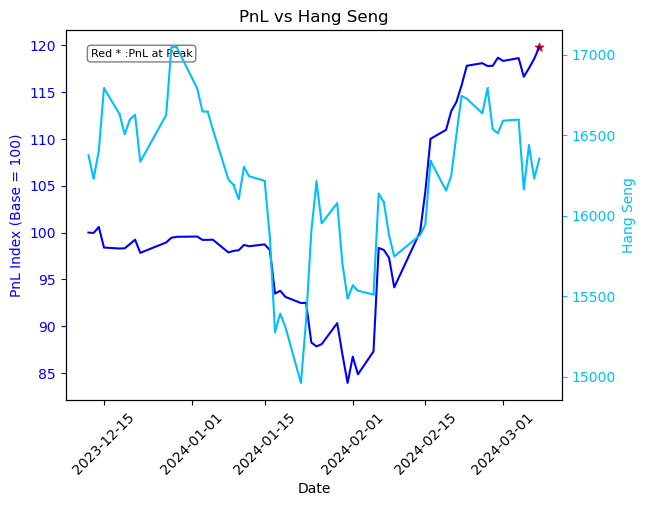

In [27]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(Date, y2, color='deepskyblue', marker=',')
ax2.set_ylabel('Hang Seng', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('PnL vs Hang Seng')
plt.show()

In [28]:
#Pnl vs HK's Hang Seng VIX
HSI_VIX = df["HSI VIX"]
HSI_VIX 

0     23.90
1     22.84
2     22.36
3     22.49
4     22.81
5     22.06
6     21.49
7     21.93
8     23.17
9     23.22
10    22.49
11    21.94
12    22.29
13    22.07
14    21.77
15    21.47
16    22.53
17    22.05
18    21.85
19    21.82
20    21.60
21    21.75
22    22.51
23    25.72
24    24.60
25    24.13
26    27.52
27    26.78
28    27.41
29    26.28
30    25.48
31    25.70
32    26.22
33    25.79
34    25.80
35    25.54
36    27.07
37    27.61
38    27.07
39    27.22
40    26.73
41    27.73
42    27.17
43    27.53
44    27.35
45    26.23
46    26.14
47    26.67
48    26.93
49    26.35
50    25.73
51    25.48
52    24.52
53    24.74
54    25.27
55    25.63
56    24.88
57    24.43
58    23.50
Name: HSI VIX, dtype: float64

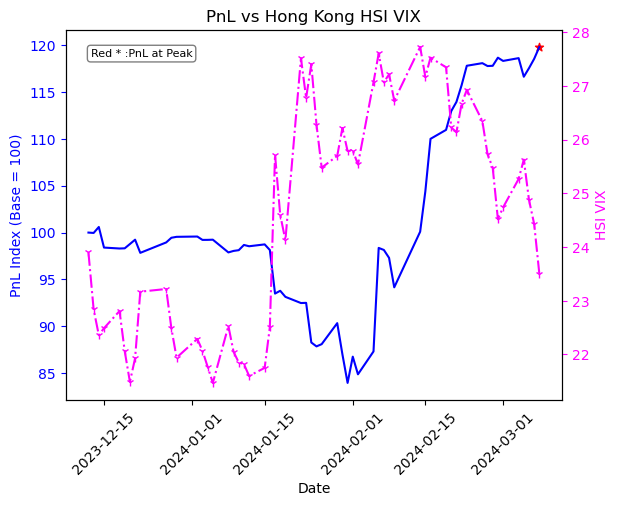

In [29]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax3 = ax1.twinx()
ax3.plot(Date, HSI_VIX , 'fuchsia', marker='1', linestyle='-.')
ax3.set_ylabel('HSI VIX', color='fuchsia')
ax3.tick_params('y', colors='fuchsia')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('PnL vs Hong Kong HSI VIX')
plt.show()

In [30]:
##########################################Performance###############################################
#Sharpe ratio
# Read in the portfolio returns data from a CSV file
R_first=df["PnL Index"].iloc[0,]
R_first
R_last = df["PnL Index"].iloc[-1]  #Always excel's actual row-2
R_last
portfolio_returns=(R_last-R_first)/R_first
portfolio_returns



0.19836180909269033

In [31]:
daily_returns=df["Returns"]
daily_returns

0     0.000000
1    -0.000400
2     0.006362
3    -0.022109
4    -0.001017
5     0.000203
6     0.004656
7     0.004674
8    -0.014263
9     0.011314
10    0.005025
11    0.001004
12    0.000321
13   -0.003627
14    0.000040
15    0.000201
16   -0.013805
17    0.001631
18    0.000815
19    0.005671
20   -0.001420
21    0.002024
22   -0.006110
23   -0.048582
24    0.003193
25   -0.006945
26   -0.007124
27    0.000216
28   -0.046879
29   -0.004722
30    0.002717
31    0.025163
32   -0.037563
33   -0.035774
34    0.032899
35   -0.021991
36    0.028384
37    0.119286
38   -0.002212
39   -0.008641
40   -0.032901
41    0.061214
42    0.042106
43    0.052412
44    0.008673
45    0.017906
46    0.008651
47    0.015574
48    0.017764
49    0.002361
50   -0.002600
51    0.000200
52    0.007344
53   -0.002920
54    0.002515
55   -0.016896
56    0.007814
57    0.008476
58    0.010646
Name: Returns, dtype: float64

In [32]:
# Max Drawdown Calculation for PnL Index
cumulative_returns = (1 + df["Returns"]).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / cumulative_max) - 1
max_drawdown = drawdown.min()

print("Max Drawdown:", max_drawdown)

Max Drawdown: -0.16954136256170405


In [33]:
# Calculate the excess returns and standard deviation
risk_free_rate = 0.04  # Hong Kong HIBOR
#Source: https://www.hsbc.com.hk/mortgages/tools/hibor-rate/
excess_returns = portfolio_returns - risk_free_rate
std_dev = np.std(daily_returns)
print("Standard Deviation of Daily Return:", std_dev)

Standard Deviation of Daily Return: 0.02482194961492814


In [34]:
# Calculate the Sharpe ratio
Sharpe_Ratio = excess_returns / std_dev
print("Sharpe Ratio:", Sharpe_Ratio)

Sharpe Ratio: 6.379910182294872


In [35]:
# Convert 'Date' column to datetime if it is not already
df['Date'] = pd.to_datetime(df['Date'])

In [36]:

# Calculate the number of unique trading days
num_trading_days = df['Date'].nunique()
print("Number of Actual Trading Days:", num_trading_days)

Number of Actual Trading Days: 59


In [37]:
#Annualized Sharpe ratio
risk_free_rate_daily = (1 + risk_free_rate) ** (1/250) - 1
risk_free_rate_daily 
average_daily_returns = daily_returns.sum() / num_trading_days
print("Average Daily Returns:", average_daily_returns)

excess_daily_return=average_daily_returns-risk_free_rate_daily 
excess_daily_return

Annualized_Sharpe_Ratio=excess_daily_return/std_dev*np.sqrt(250)
print("Annualized Sharpe Ratio:", Annualized_Sharpe_Ratio)

Average Daily Returns: 0.003067041780100462
Annualized Sharpe Ratio: 1.8537406991213181


In [38]:
# Calculate the Profit Factor
positive_returns = daily_returns[daily_returns > 0].sum()
negative_returns = daily_returns[daily_returns < 0].sum()

# Avoid division by zero
if negative_returns != 0:
    profit_factor = abs(positive_returns / negative_returns)
else:
    profit_factor = float('inf')

print("Profit Factor:", profit_factor)


Profit Factor: 1.5345796093566546


In [39]:
#Alpha
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame based on the 'Date' column to ensure chronological order
df = df.sort_values('Date')

# Calculate daily returns of the Hang Seng index as percentage change from the previous row
df['HSI_daily_return'] = df['Hang Seng'].pct_change()

# Calculate the mean of the daily returns of HSI
mean_HSI_return = df['HSI_daily_return'][1:].mean()

print("Mean Daily Return of Hang Seng:", mean_HSI_return)

#Portfolio Alpha
# Compute the mean returns
# Calculate daily returns of the PnL as percentage change from the previous row
df['PnL_daily_return'] = df['PnL Index'].pct_change()

# Calculate the mean (average) of the daily returns
mean_PnL_return = df['PnL_daily_return'][1:].mean()
print("Mean Daily Return of PnL:", mean_PnL_return)

# Compute beta
covariance = df['PnL_daily_return'].cov(df['HSI_daily_return'])

print("Covariance between PnL and Hang Seng daily returns:", covariance)
variance = df['HSI_daily_return'].var()
variance
beta = covariance / variance
beta

# Compute alpha (assuming risk-free rate is 0)
alpha = (mean_PnL_return - (risk_free_rate_daily  +beta * mean_HSI_return))*np.sqrt(250)
# Print alpha
print("Alpha: ", alpha)


Mean Daily Return of Hang Seng: 9.581469707313926e-05
Mean Daily Return of PnL: 0.0034435943309940233
Covariance between PnL and Hang Seng daily returns: 0.00019226755817673832
Alpha:  0.050758348684700215


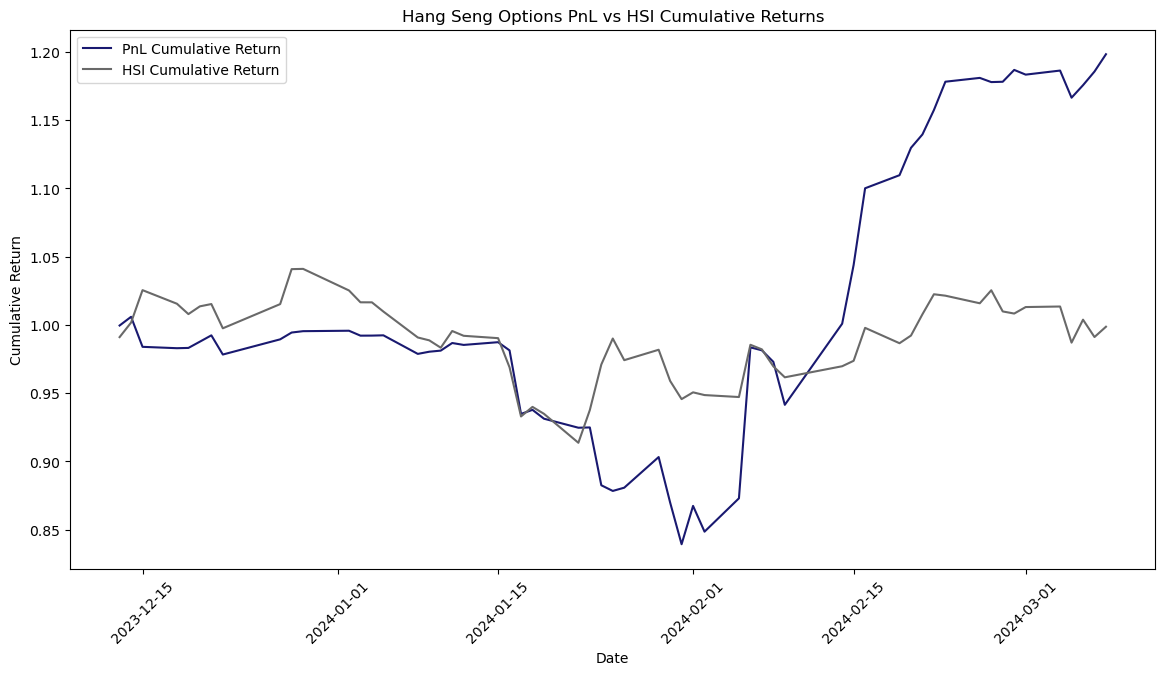

Performance difference between my Options PnL and HSI since the beginning: 0.19965100876290942


In [40]:
#Excess return of my Options PnL vesus the Hang Seng Index since the beginning
# Calculate daily returns for PnL and HSI
df['PnL_daily_return'] = df['PnL Index'].pct_change()
df['HSI_daily_return'] = df['Hang Seng'].pct_change()

# Calculate cumulative returns for PnL and HSI
df['PnL_cumulative_return'] = (1 + df['PnL_daily_return']).cumprod()
df['HSI_cumulative_return'] = (1 + df['HSI_daily_return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.xticks(rotation=45)
plt.plot(df['Date'], df['PnL_cumulative_return'], label='PnL Cumulative Return',  color='midnightblue')
plt.plot(df['Date'], df['HSI_cumulative_return'], label='HSI Cumulative Return', color='dimgrey')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Hang Seng Options PnL vs HSI Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print the performance difference
performance_difference = df['PnL_cumulative_return'].iloc[-1] - df['HSI_cumulative_return'].iloc[-1]
print(f"Performance difference between my Options PnL and HSI since the beginning: {performance_difference}")
